In [1]:
import pandas
import matplotlib.pyplot as pyplot

In [2]:
year = "2019"

In [3]:
book_data = pandas.read_csv(f"./data/{year}.csv")

In [4]:
book_data["title"].count()

53

In [5]:
book_data["author"].drop_duplicates().count()

31

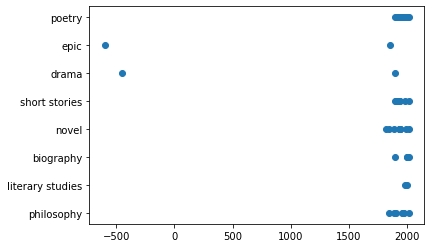

In [6]:
# Scatter of genre by time (all time)
pyplot.scatter(book_data["year"], book_data["genre"])

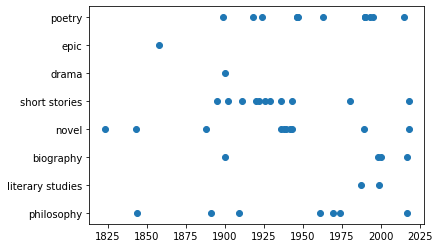

In [7]:
# Scatter of genre by time (AD)
recent_book_data = book_data[book_data["year"] > 0]
pyplot.scatter(recent_book_data["year"], recent_book_data["genre"])

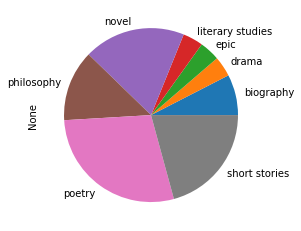

In [8]:
# Pie of genres
book_data.groupby("genre").size().plot.pie()

In [15]:
# Top 10 authors
book_data.groupby("author").size().sort_values(ascending=False).head(10)

author
Stefan Zweig                9
Ayn Rand                    5
Rolf Schilling              5
Hans Bethge                 4
Theodor Däubler             2
Ὅμηρος                      1
Gerard Manley Hopkins       1
James Huneker               1
Hans Magnus Enzensberger    1
Gunnar Kaiser               1
dtype: int64

In [16]:
book_data

,author,title,year,genre
0,Oscar Wilde,The Soul of man under Socialism,1891.0,philosophy
1,NaN,Nietzsche. Werk und Wirkungen,1974.0,philosophy
2,Christian Benne; Claus Zittel,Nietzsche und die Lyrik: Ein Kompendium,2017.0,philosophy
3,Ayn Rand,The Romantic Manifesto,1969.0,philosophy
4,Ayn Rand,For the New Intellectual,1961.0,philosophy
5,James Huneker,Egoists. A Book of Supermen,1909.0,philosophy
6,Max Stirner,Der Einzige und sein Eigentum,1844.0,philosophy
7,NaN,George-Jahrbuch. Band 2,1999.0,literary studies
8,Marita Keilson-Lauritz,Von der Liebe die Freundschaft heißt,1987.0,literary studies
9,Hans Bethge,Hölderlin,1900.0,biography
